真实标签: Coat
预测标签: Coat


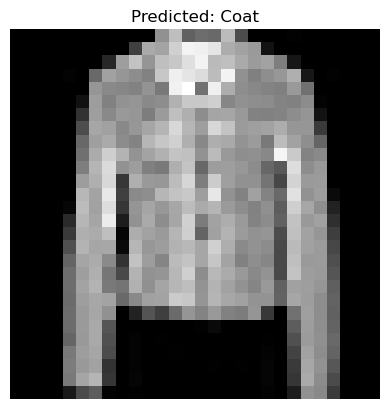

In [ ]:

import torch
import torchvision.transforms as transforms
from torchvision.datasets import FashionMNIST
from model import ImprovedCNN  # 确保你的 model.py 中有 ImprovedCNN 类
import matplotlib.pyplot as plt
import os

# 设置设备
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 类别标签
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# 加载模型
model_path = 'checkpoints/best_model.pth'
assert os.path.exists(model_path), f"模型文件未找到: {model_path}"

model = ImprovedCNN(num_classes=10).to(device)
checkpoint = torch.load(model_path, map_location=device, weights_only=False)
model.load_state_dict(checkpoint['model_state_dict'])
model.eval()

# 数据转换
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# 加载测试集
test_dataset = FashionMNIST(root='data', train=False, download=True, transform=transform)

# 选一张图片
index = 10
image, label = test_dataset[index]
image_unsqueezed = image.unsqueeze(0).to(device)  # 加一个 batch 维度

# 模型预测
with torch.no_grad():
    output = model(image_unsqueezed)
    _, predicted = output.max(1)

# 打印信息
print(f"真实标签: {class_names[label]}")
print(f"预测标签: {class_names[predicted.item()]}")

# 展示图片（反归一化后）
image_to_show = image * 0.5 + 0.5  # 反归一化
plt.imshow(image_to_show.squeeze().cpu().numpy(), cmap='gray')
plt.title(f"Predicted: {class_names[predicted.item()]}")
plt.axis('off')
plt.show()


In [14]:
torch.randint(0, len(test_dataset), (1, ))

tensor([6451])